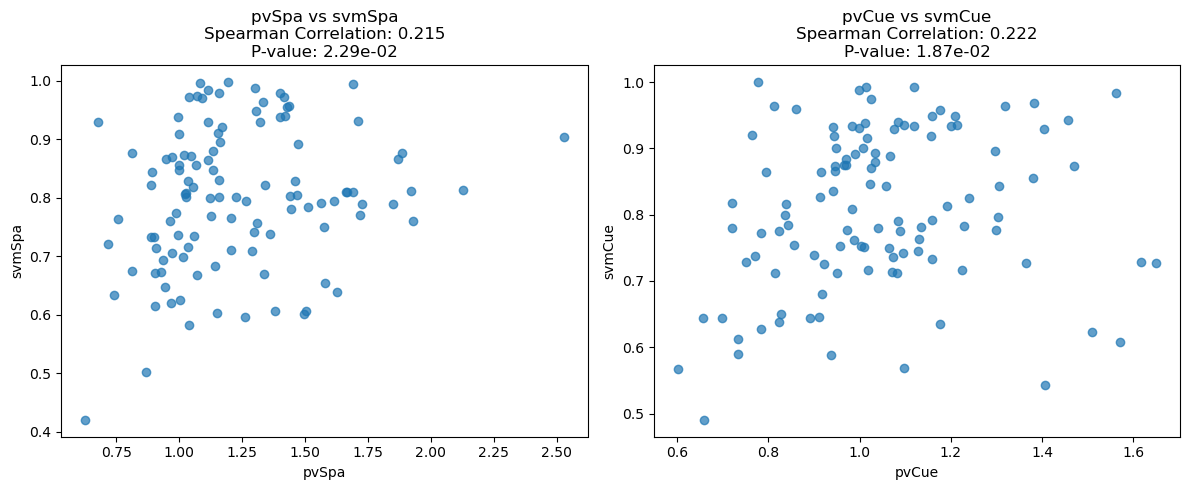

In [2]:
import numpy as np
import scipy.io
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

file_path = '../Data/06_PV_and_SVM_Accuracy.mat'
mat = scipy.io.loadmat(file_path)

pvSpa = mat.get('pvSpa').flatten()
pvCue = mat.get('pvCue').flatten()
svmSpa = mat.get('svmSpa').flatten()
svmCue = mat.get('svmCue').flatten()

# Performing Spearman rank correlation for pvSpa vs svmSpa
corr_spearman_pvSpa_svmSpa, p_value_pvSpa_svmSpa = scipy.stats.spearmanr(pvSpa, svmSpa)

# Performing Spearman rank correlation for pvCue vs svmCue
corr_spearman_pvCue_svmCue, p_value_pvCue_svmCue = scipy.stats.spearmanr(pvCue, svmCue)

# Preparing plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for pvSpa vs svmSpa
axes[0].scatter(pvSpa, svmSpa, alpha=0.7)
axes[0].set_title(f'pvSpa vs svmSpa\nSpearman Correlation: {corr_spearman_pvSpa_svmSpa:.3f}\nP-value: {p_value_pvSpa_svmSpa:.2e}')
axes[0].set_xlabel('pvSpa')
axes[0].set_ylabel('svmSpa')

# Plot for pvCue vs svmCue
axes[1].scatter(pvCue, svmCue, alpha=0.7)
axes[1].set_title(f'pvCue vs svmCue\nSpearman Correlation: {corr_spearman_pvCue_svmCue:.3f}\nP-value: {p_value_pvCue_svmCue:.2e}')
axes[1].set_xlabel('pvCue')
axes[1].set_ylabel('svmCue')

# Layout adjustment
plt.tight_layout()
plt.show()

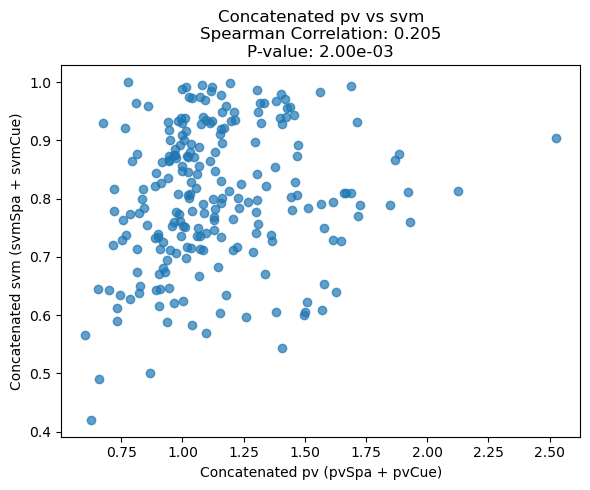

In [3]:
# Concatenating the pvSpa and pvCue, and svmSpa and svmCue
concatenated_pv = np.concatenate((pvSpa, pvCue))
concatenated_svm = np.concatenate((svmSpa, svmCue))

# Performing Spearman rank correlation for concatenated data
corr_spearman_concatenated, p_value_concatenated = scipy.stats.spearmanr(concatenated_pv, concatenated_svm,
                                                                         nan_policy='raise', alternative='two-sided')

# Plotting the concatenated data
plt.figure(figsize=(6, 5))
plt.scatter(concatenated_pv, concatenated_svm, alpha=0.7)
plt.title(f'Concatenated pv vs svm\nSpearman Correlation: {corr_spearman_concatenated:.3f}\nP-value: {p_value_concatenated:.2e}')
plt.xlabel('Concatenated pv (pvSpa + pvCue)')
plt.ylabel('Concatenated svm (svmSpa + svmCue)')
plt.tight_layout()
plt.show()